In [4]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [5]:
#importing the dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models




In [6]:
#data curation
#upload the json file


In [7]:
!pip install kaggle

     ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
     ------------- -------------------------- 30.7/90.6 kB 1.3 MB/s eta 0:00:01
     ------------------------- ------------ 61.4/90.6 kB 656.4 kB/s eta 0:00:01
     -------------------------------------- 90.6/90.6 kB 736.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ---------------------------------------- 78.2/78.2 kB 2.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.11-py3-none-any.whl size=114571 sha256=8140cb86b5b4c2a83c4dfc3242e5abd7ee573299901aae903fdc75b669ede56d
  Stored in directory: c:\users\subra\appdata\local\pip\cache\wheels\fa\9f\ba\ec48d872e799857a3e375ea86dfde7c0c147a418b49bca20ef
Successfully built kaggle


In [8]:
kaggle_credentails = json.load(open("kaggle.json"))

In [9]:
#set kaggle API
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [10]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:00<29:31, 1.24MB/s]
  0%|          | 2.00M/2.04G [00:01<15:18, 2.38MB/s]
  0%|          | 3.00M/2.04G [00:01<09:56, 3.67MB/s]
  0%|          | 5.00M/2.04G [00:01<05:28, 6.65MB/s]
  0%|          | 7.00M/2.04G [00:01<08:12, 4.43MB/s]
  0%|          | 8.00M/2.04G [00:02<09:15, 3.93MB/s]
  0%|          | 9.00M/2.04G [00:02<09:23, 3.87MB/s]
  0%|          | 10.0M/2.04G [00:02<10:07, 3.59MB/s]
  1%|          | 11.0M/2.04G [00:03<10:52, 3.34MB/s]
  1%|          | 12.0M/2.04G [00:03<11:54, 3.05MB/s]
  1%|          | 13.0M/2.04G [00:04<11:52, 3.06MB/s]
  1%|          | 14.0M/2.04G [00:04<10:57, 3.31MB/s]
  1%|          | 16.0M/2.04G [00:04<09:50, 3.68MB/s]
  1%|          | 17.0M/2.04G [00:05<09:35, 3.77MB/s]
  1%|          | 18.0M/2.04G [00:05<08:21, 4.33MB/s]
  1%|          | 19.0M/2.04G [00:05<10:15, 3.53MB/s]
  1%|          | 20.0M/2.04G [00:05<09:23, 3.85MB/s]
  1%|          | 21.0M/2.04G [00:06<11:11, 3.23MB/s]
 

In [11]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
#unZip the dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
      zip_ref.extractall()

In [13]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [15]:
print(len(os.listdir("D:\Machine Learning projects\Tree Disease Prediction\plantvillage dataset\color\Grape___healthy")))
print(os.listdir("D:\Machine Learning projects\Tree Disease Prediction\plantvillage dataset\color\Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


In [16]:
#dataset path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


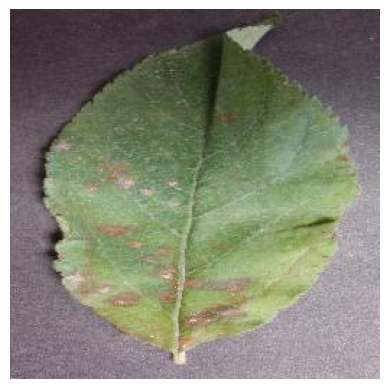

In [22]:
image_path = 'plantvillage dataset/color/Apple___Cedar_apple_rust/fa148283-75ee-4806-8282-63662a2e05c1___FREC_C.Rust 4416.JPG'

#read the image
img = mpimg.imread(image_path)

print(img.shape)
#display the image
plt.imshow(img)
plt.axis('off') #turn off axis numbers
plt.show()

In [23]:
#image parameters
img_size = 224
batch_size = 32

In [24]:
#image data generator
daat_gen = ImageDataGenerator(
      rescale=1./255,
      validation_split = 0.2  #use 20% data for validation
)

In [26]:
#train generator

train_generator = daat_gen.flow_from_directory(
      base_dir,
      target_size=(img_size, img_size),
      batch_size=batch_size,
      subset='training',
      class_mode='categorical'

)

Found 43456 images belonging to 38 classes.


In [27]:
#validation generator
validation_generator = daat_gen.flow_from_directory(
      base_dir,
      target_size=(img_size, img_size),
      batch_size=batch_size,
      subset='validation',
      class_mode='categorical'

)

Found 10849 images belonging to 38 classes.


In [28]:
#model definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),activation='relu',input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

c:\Users\subra\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
#training the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size, #number of steps per epoch
      epochs=5, #number of epochs
      validation_data = validation_generator,
      validation_steps = validation_generator.samples // batch_size  #validation steps
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 859s 632ms/step - accuracy: 0.9734 - loss: 0.0800 - val_accuracy: 0.8721 - val_loss: 0.5650
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2530
Epoch 3/5


c:\Users\subra\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 874s 643ms/step - accuracy: 0.9827 - loss: 0.0541 - val_accuracy: 0.8750 - val_loss: 0.5776
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.8856e-04
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 940s 692ms/step - accuracy: 0.9859 - loss: 0.0444 - val_accuracy: 0.8779 - val_loss: 0.5791


In [32]:
#epoch = how many batches i have added

In [36]:
#model evaluation
print("Evaluarting model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy : {val_accuracy * 100:.2f}%")

Evaluarting model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 51s 151ms/step - accuracy: 0.8773 - loss: 0.5743
Validation Accuracy : 87.79%


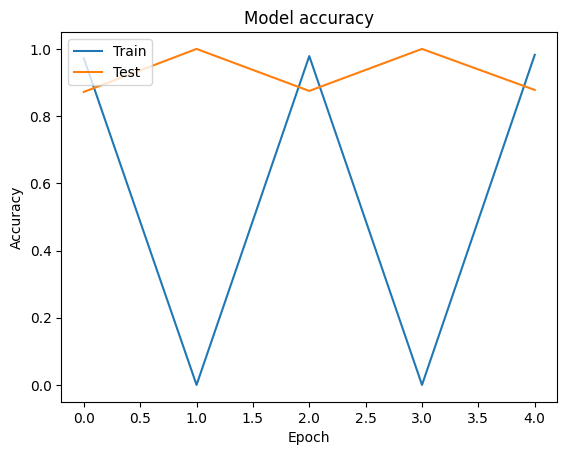

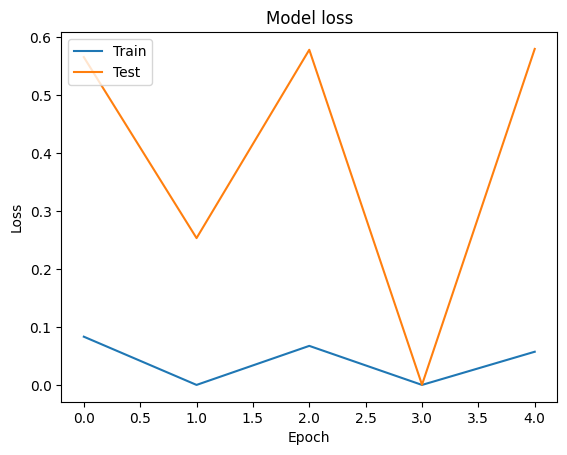

In [38]:
#plot training and validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
#function to load and preprocess the image using pillow
def  load_and_preprocess_image(image_path, traget_size=(224, 224)):
      #load the image
      img = Image.open(image_path)
      #resize the image
      img = img.resize(traget_size)
      #convert the image to a numpy array
      img_array = np.array(img)
      #add batch dimention
      img_array = np.expand_dims(img_array, axis=0)
      #scale the image value to [0,1]
      img_array = img_array.astype('float32') / 255.
      return img_array

#function to predict the class of an image

def predict_image_class(model, image_path, class_indices):
      preprocessed_image = load_and_preprocess_image(image_path)
      predictions = model.predict(preprocessed_image)
      predicted_class_index = np.argmax(predictions, axis=1)[0]
      predicted_class_name = class_indices[predicted_class_index]
      return predicted_class_name

In [40]:
#create  a mapping from class indices to class name
class_indices = {v:k for k,v in train_generator.class_indices.items()}

In [41]:
class_indices


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [42]:
#saving the class name as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [51]:
#example usages
image_path = 'test.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

#output of the result
print("Predicted class name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class name: Apple___Black_rot


In [53]:
model.save('D:\Machine Learning projects\Tree Disease Prediction\plant_disease_prediction_model.h5')